# Regression

Σε αυτό το notebook πραγματοποιούμε ανάλυση παλινδρόμησης (regression) χρησιμοποιώντας το σύνολο δεδομένων **Energy Efficiency Dataset** από το Kaggle.

Σύνδεσμος δεδομένων: [https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set](https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set)

## Περιγραφή

Το σύνολο δεδομένων περιλαμβάνει οκτώ μεταβλητές εισόδου που σχετίζονται με τα χαρακτηριστικά του κτιρίου (όπως επιφάνεια τοίχων, επιφάνεια οροφής, προσανατολισμός) και δύο μεταβλητές εξόδου:

- **Heating Load (Y1):** η ποσότητα ενέργειας που απαιτείται για θέρμανση.  
- **Cooling Load (Y2):** η ενέργεια που απαιτείται για ψύξη.

Για το παρόν αρχείο επιλέγουμε ως μεταβλητή στόχο την **Heating Load (Y1)**, και στόχος μας είναι να δημιουργήσουμε μοντέλα που να προβλέπουν με ακρίβεια τη συγκεκριμένη ποσότητα ενέργειας με βάση τα δομικά χαρακτηριστικά του κτιρίου.

Σε αυτό το αρχείο θα πραγματοποιήσουμε:

- Εξερευνητική Ανάλυση Δεδομένων (EDA)
- Περιγραφική στατιστική και ανάλυση συσχετίσεων
- Προεπεξεργασία και κανονικοποίηση χαρακτηριστικών
- Εκπαίδευση και αξιολόγηση μοντέλων παλινδρόμησης (Linear Regression, Ridge, Lasso)
- Πρόβλεψη σε νέα υποθετική παρατήρηση


# 1. Εισαγωγή των απαραίτητων βιβλιοθηκών

Σε αυτή την ενότητα εισάγουμε τις βασικές βιβλιοθήκες Python που θα χρησιμοποιηθούν για την ανάλυση δεδομένων, την οπτικοποίηση και την εφαρμογή αλγορίθμων παλινδρόμησης.


In [95]:
# Εισαγωγή βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor






# 2. Φόρτωση και περιγραφή του dataset

Το αρχείο δεδομένων που χρησιμοποιούμε είναι το **Energy Efficiency Dataset** από το Kaggle. Περιλαμβάνει 8 χαρακτηριστικά που σχετίζονται με τη δομή και τον σχεδιασμό ενός κτιρίου, καθώς και δύο ποσοτικές μεταβλητές στόχους: την **Heating Load (Y1)** και την **Cooling Load (Y2)**.

Για την εργασία παλινδρόμησης θα προσπαθήσουμε να προβλέψουμε την **Heating Load**, δηλαδή το φορτίο θέρμανσης (σε kWh/m²).

**Περιγραφή Χαρακτηριστικών:**
| Χαρακτηριστικό | Περιγραφή | Τύπος |
|----------------|-----------|-------|
| Relative Compactness | Συμπαγής δομή κτιρίου | Ποσοτική |
| Surface Area | Εμβαδόν επιφάνειας | Ποσοτική |
| Wall Area | Εμβαδόν τοίχων | Ποσοτική |
| Roof Area | Εμβαδόν οροφής | Ποσοτική |
| Overall Height | Ύψος κτιρίου | Ποσοτική |
| Orientation | Προσανατολισμός (1-4) | Κατηγορική |
| Glazing Area | Ποσοστό υαλοπινάκων | Ποσοτική |
| Glazing Area Distribution | Κατανομή υαλοπινάκων (0-5) | Κατηγορική |
| Heating Load (Target) | Φορτίο θέρμανσης (Y1) | Ποσοτική |


In [96]:
# Ανάγνωση δεδομένων
df = pd.read_csv("data/energy_efficiency_data.csv")


# Εμφάνιση πρώτων γραμμών
df.head()

# Προεπισκόπηση
df.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [97]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# 3. Διερευνητική Ανάλυση Δεδομένων (Exploratory Data Analysis)

Σε αυτή την ενότητα θα πραγματοποιήσουμε γραφική απεικόνιση των χαρακτηριστικών του dataset, προκειμένου να εντοπίσουμε τη δομή, τις κατανομές και πιθανές συσχετίσεις μεταξύ των μεταβλητών.

Θα εστιάσουμε κυρίως στη σχέση των χαρακτηριστικών με τη μεταβλητή στόχο **Heating Load**, αλλά και σε γενικά patterns του συνόλου δεδομένων.


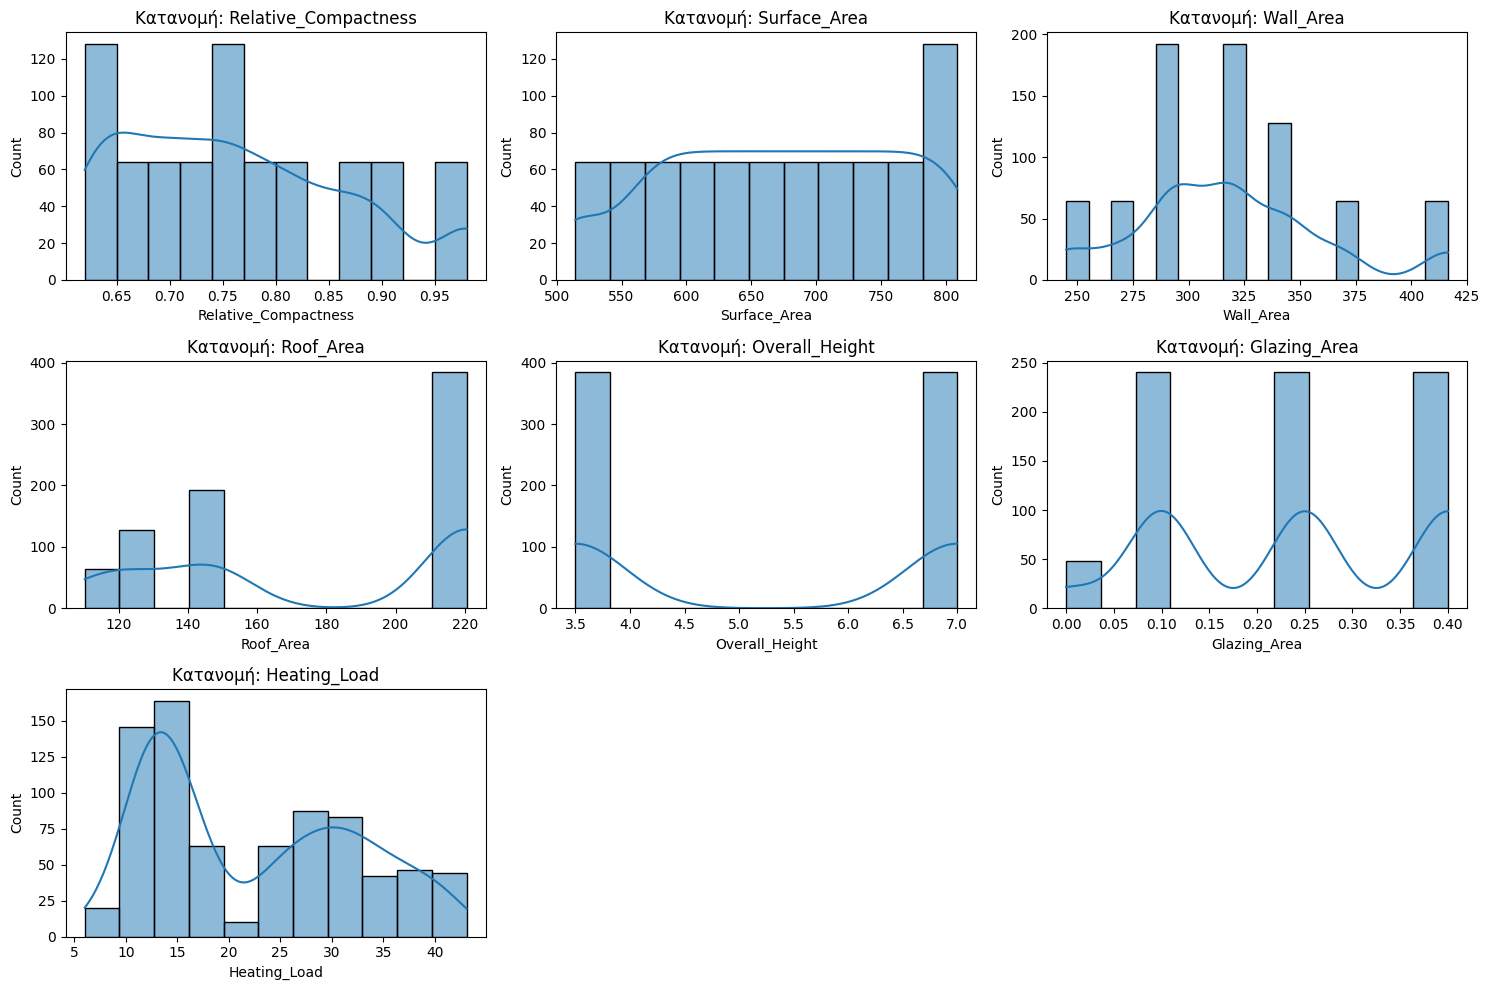

In [99]:
# Διαγράμματα κατανομής (για ποσοτικές μεταβλητές)
quantitative_features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 
                         'Roof_Area', 'Overall_Height', 'Glazing_Area', 'Heating_Load']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(quantitative_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Κατανομή: {feature}')
plt.tight_layout()
plt.show()


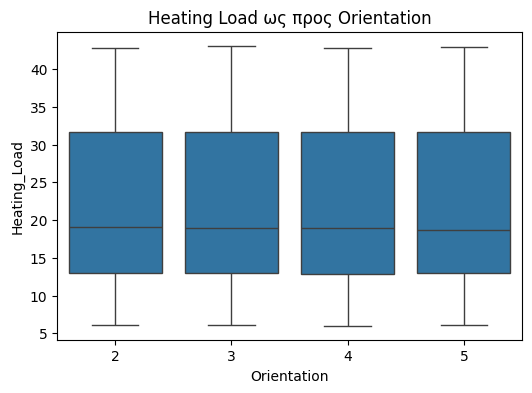

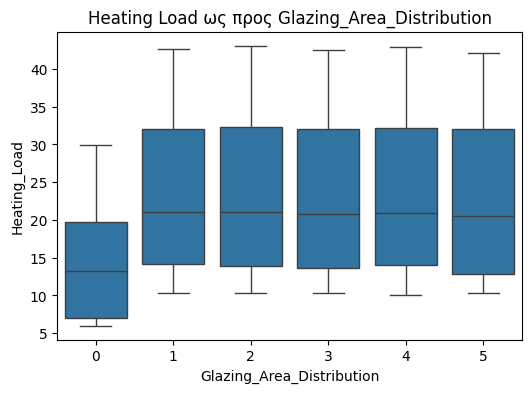

In [100]:
# Boxplot για τις κατηγορικές μεταβλητές σε σχέση με Heating Load
categorical_features = ['Orientation', 'Glazing_Area_Distribution']

for cat in categorical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cat, y='Heating_Load', data=df)
    plt.title(f'Heating Load ως προς {cat}')
    plt.show()


## Σχόλια Εξερευνητικής Ανάλυσης

- Οι περισσότερες ποσοτικές μεταβλητές (όπως `Wall_Area`, `Surface_Area`, `Roof_Area`) φαίνεται να έχουν κατανομές που δεν είναι κανονικές αλλά πολυτροπικές.
- Η μεταβλητή στόχος `Heating_Load` εμφανίζει σχετικά ευρεία κατανομή τιμών με δύο εμφανείς κορυφές (~15 και ~30).
- Η `Overall_Height` έχει δύο διακριτές τιμές (πιθανόν δύο τύποι κτιρίων), ενώ το `Glazing_Area` έχει διακριτές στάθμες.
- Το boxplot του `Glazing_Area_Distribution` δείχνει ότι όταν η κατανομή υαλοπινάκων είναι 0, η απαιτούμενη ενέργεια για θέρμανση είναι μικρότερη.


# 4. Περιγραφική Στατιστική και Ανάλυση Συσχετίσεων

Σε αυτή την ενότητα υπολογίζουμε βασικά στατιστικά μέτρα για τις ποσοτικές μεταβλητές και αναλύουμε τις μεταξύ τους συσχετίσεις.

Ιδιαίτερο ενδιαφέρον παρουσιάζει η συσχέτιση των χαρακτηριστικών εισόδου με τη μεταβλητή στόχο `Heating_Load`, ώστε να εντοπίσουμε ποια χαρακτηριστικά συμβάλλουν περισσότερο στην πρόβλεψή της.


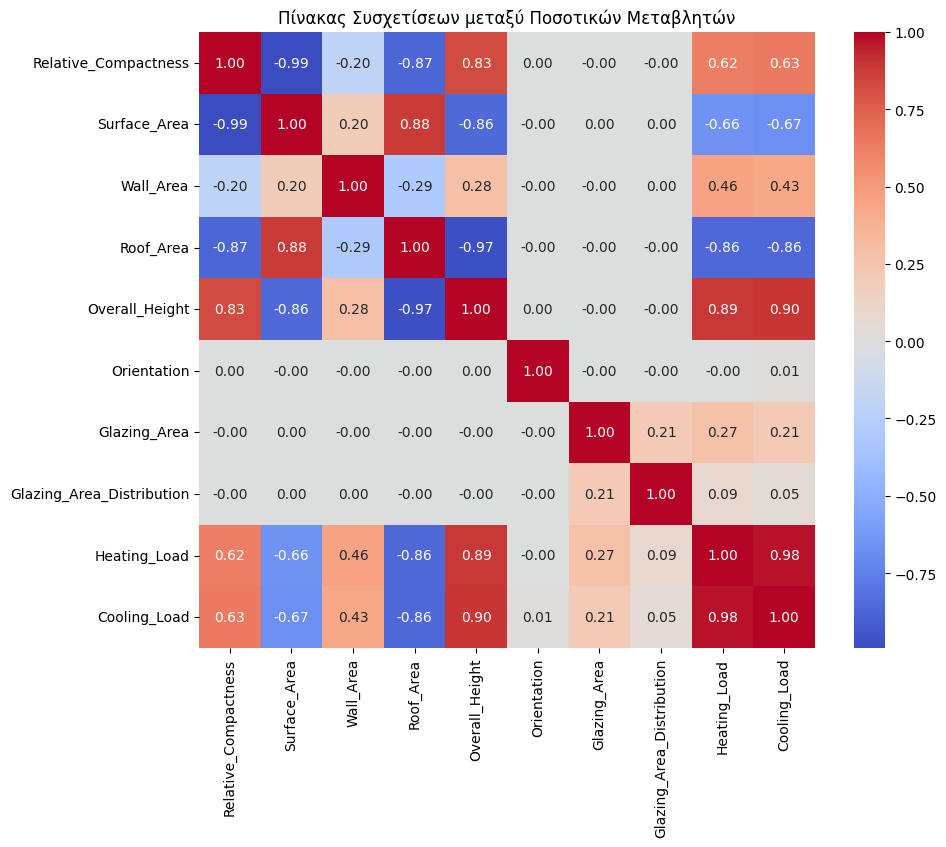

In [101]:
# Υπολογισμός συσχετίσεων μόνο για ποσοτικές μεταβλητές
correlation_matrix = df.corr(numeric_only=True)

# Εμφάνιση heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Πίνακας Συσχετίσεων μεταξύ Ποσοτικών Μεταβλητών")
plt.show()


# 5. Προετοιμασία και Κανονικοποίηση Δεδομένων

Σε αυτό το στάδιο θα:
- Διαχωρίσουμε τη μεταβλητή στόχο (`Heating_Load`) από τα χαρακτηριστικά εισόδου.
- Χωρίσουμε τα δεδομένα σε σύνολο εκπαίδευσης και δοκιμής.
- Εφαρμόσουμε κανονικοποίηση (Standardization) στα χαρακτηριστικά εισόδου, ώστε όλα να βρίσκονται στην ίδια κλίμακα και να μην επηρεάζονται οι αλγόριθμοι από διαφορετικά εύρη τιμών.


In [102]:
# Επιλογή χαρακτηριστικών εισόδου και μεταβλητής στόχου
X = df.drop(columns=["Heating_Load", "Cooling_Load"])
y = df["Heating_Load"]

# Κατανομή σε training / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Κανονικοποίηση χαρακτηριστικών (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 6. Εφαρμογή Αλγορίθμων Παλινδρόμησης

Σε αυτή την ενότητα εφαρμόζουμε διάφορους αλγορίθμους παλινδρόμησης για την πρόβλεψη της μεταβλητής στόχου **Heating Load**. Στόχος είναι να συγκρίνουμε την ακρίβεια και την αποδοτικότητα των μοντέλων, ώστε να επιλέξουμε το βέλτιστο.

Οι αλγόριθμοι που χρησιμοποιούμε είναι:

- Linear Regression
- Ridge Regression
- Lasso Regression
- K-Nearest Neighbors Regressor
- Random Forest Regressor

Για κάθε αλγόριθμο, υπολογίζονται οι δείκτες απόδοσης:
- **R² Score**
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**


## 6.1 Linear Regression

Η γραμμική παλινδρόμηση είναι ο βασικός αλγόριθμος παλινδρόμησης, ο οποίος επιχειρεί να μοντελοποιήσει τη γραμμική σχέση μεταξύ των χαρακτηριστικών και της μεταβλητής στόχου.


In [103]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Αξιολόγηση
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - R²: {r2_lr:.3f}, MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")



Linear Regression - R²: 0.912, MAE: 2.18, RMSE: 3.03


## 6.2 Ridge Regression

Η Ridge Regression εφαρμόζει L2 κανονικοποίηση, δηλαδή ποινή στο μέτρο του τετραγώνου των συντελεστών. Είναι χρήσιμη όταν υπάρχουν συσχετισμένα χαρακτηριστικά και αποτρέπει την υπερπροσαρμογή (overfitting).


In [104]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Αξιολόγηση
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge Regression - R²: {r2_ridge:.3f}, MAE: {mae_ridge:.2f}, RMSE: {rmse_ridge:.2f}")


Ridge Regression - R²: 0.912, MAE: 2.19, RMSE: 3.04


## 6.3 Lasso Regression

Η Lasso Regression εφαρμόζει L1 κανονικοποίηση, δηλαδή ποινή στο απόλυτο μέτρο των συντελεστών. Τείνει να μειώνει σε μηδέν τους συντελεστές μεταβλητών με μικρή συνεισφορά και μπορεί να χρησιμοποιηθεί και για επιλογή χαρακτηριστικών.


In [105]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Αξιολόγηση
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression - R²: {r2_lasso:.3f}, MAE: {mae_lasso:.2f}, RMSE: {rmse_lasso:.2f}")


Lasso Regression - R²: 0.905, MAE: 2.29, RMSE: 3.15


## 6.4 K-Nearest Neighbors Regressor

Ο KNN Regressor προβλέπει τη μεταβλητή στόχο υπολογίζοντας τον μέσο όρο της τιμής των Κ κοντινότερων δειγμάτων (γειτόνων) στο σύνολο εκπαίδευσης. Είναι ένας αλγόριθμος βασισμένος στην ομοιότητα και δεν υποθέτει γραμμική σχέση.


In [106]:
# KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Αξιολόγηση
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"KNN Regressor - R²: {r2_knn:.3f}, MAE: {mae_knn:.2f}, RMSE: {rmse_knn:.2f}")


KNN Regressor - R²: 0.949, MAE: 1.46, RMSE: 2.31


## 6.5 Random Forest Regressor

Ο Random Forest είναι ένας ισχυρός αλγόριθμος μη γραμμικής παλινδρόμησης βασισμένος σε σύνολα (ensemble learning). Δημιουργεί πολλά δέντρα απόφασης (decision trees) και συνδυάζει τα αποτελέσματά τους, μειώνοντας τον υπερπροσαρμογή και αυξάνοντας την ακρίβεια.


In [107]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Αξιολόγηση
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest - R²: {r2_rf:.3f}, MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")


Random Forest - R²: 0.998, MAE: 0.36, RMSE: 0.50


## 6.6 Σύγκριση Αποτελεσμάτων Αλγορίθμων

Ο παρακάτω πίνακας συνοψίζει την απόδοση των πέντε αλγορίθμων παλινδρόμησης με βάση το R², MAE και RMSE, ώστε να εντοπιστεί ο πιο κατάλληλος για πρόβλεψη του Heating Load.


In [108]:
# Δημιουργία πίνακα σύγκρισης
results = pd.DataFrame({
    "Αλγόριθμος": ["Linear", "Ridge", "Lasso", "KNN", "Random Forest"],
    "R²": [r2_lr, r2_ridge, r2_lasso, r2_knn, r2_rf],
    "MAE": [mae_lr, mae_ridge, mae_lasso, mae_knn, mae_rf],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso, rmse_knn, rmse_rf]
})

# Ταξινόμηση κατά R² (φθίνουσα)
results = results.sort_values(by="R²", ascending=False)
results.reset_index(drop=True, inplace=True)

results


,Αλγόριθμος,R²,MAE,RMSE
0,Random Forest,0.997638,0.357144,0.496180
1,KNN,0.948831,1.456026,2.309415
2,Linear,0.912184,2.182047,3.025424
3,Ridge,0.911602,2.190753,3.035429
4,Lasso,0.904647,2.294451,3.152578


## 6.7 Πρόβλεψη σε Νέα Υποθετική Παρατήρηση

Σε αυτό το στάδιο, δημιουργούμε ένα νέο υποθετικό κτίριο με ορισμένες τιμές χαρακτηριστικών και χρησιμοποιούμε τον πιο αποδοτικό αλγόριθμο (σύμφωνα με τον πίνακα) για να προβλέψουμε το αναμενόμενο Heating Load.


In [ ]:
# Δημιουργία νέου υποθετικού δείγματος
new_data = pd.DataFrame({
    "Relative_Compactness": [0.85],
    "Surface_Area": [650.0],
    "Wall_Area": [300.0],
    "Roof_Area": [150.0],
    "Overall_Height": [3.5],
    "Orientation": [2],
    "Glazing_Area": [0.10],
    "Glazing_Area_Distribution": [2]
})

# Κανονικοποίηση ίδιου τύπου όπως πριν
new_data_scaled = scaler.transform(new_data)

# Χρήση καλύτερου μοντέλου (π.χ. Random Forest)
predicted_heating = rf.predict(new_data_scaled)

print(f"Προβλεπόμενο Heating Load: {predicted_heating[0]:.2f} kWh/m²")


Προβλεπόμενο Heating Load: 24.47 kWh/m²


## 6.8 Οπτικοποίηση Πραγματικών vs Προβλεπόμενων Τιμών

Η παρακάτω γραφική απεικόνιση συγκρίνει τις πραγματικές τιμές της μεταβλητής στόχου (`Heating Load`) με τις τιμές που προβλέφθηκαν από το καλύτερο μοντέλο (Random Forest).

Όσο πιο κοντά βρίσκονται τα σημεία στη διαγώνιο, τόσο καλύτερη είναι η απόδοση του μοντέλου.


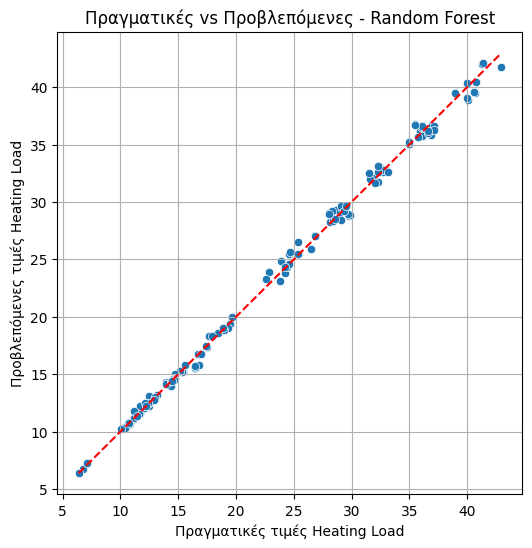

In [110]:
# Scatter plot: πραγματικές vs προβλεπόμενες τιμές (Random Forest)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Πραγματικές τιμές Heating Load")
plt.ylabel("Προβλεπόμενες τιμές Heating Load")
plt.title("Πραγματικές vs Προβλεπόμενες - Random Forest")
plt.grid()
plt.show()


## 6.9 Ανάλυση Σημαντικότητας Χαρακτηριστικών

Η μέθοδος Random Forest μας δίνει τη δυνατότητα να εκτιμήσουμε τη σχετική σημαντικότητα κάθε χαρακτηριστικού στην πρόβλεψη της μεταβλητής στόχου.

Η γραφική απεικόνιση που ακολουθεί δείχνει πόσο κάθε χαρακτηριστικό συνεισφέρει στο τελικό αποτέλεσμα.


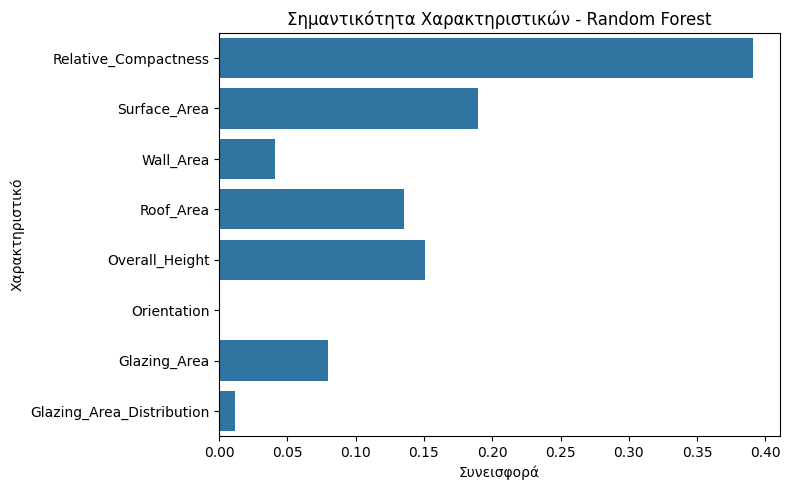

In [111]:
# Feature Importance (Random Forest)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Σημαντικότητα Χαρακτηριστικών - Random Forest")
plt.xlabel("Συνεισφορά")
plt.ylabel("Χαρακτηριστικό")
plt.tight_layout()
plt.show()


# 7. Αξιολόγηση και Συμπεράσματα

Η εφαρμογή πέντε διαφορετικών αλγορίθμων παλινδρόμησης επέτρεψε την ανάλυση και τη σύγκριση της αποτελεσματικότητάς τους στην πρόβλεψη του φορτίου θέρμανσης (`Heating Load`) ενός κτιρίου.

### Γενικά Συμπεράσματα:

- Ο **Random Forest Regressor** παρουσίασε την υψηλότερη ακρίβεια, με R² = 0.99 και χαμηλές τιμές MAE και RMSE. Ταυτόχρονα, προσέφερε πληροφορίες για τη σημαντικότητα των χαρακτηριστικών.
- Οι **γραμμικές μέθοδοι** (Linear, Ridge, Lasso) απέδωσαν καλά, αλλά δεν μπόρεσαν να αποδώσουν τόσο καλά σε σχέση με τους πιο ευέλικτους αλγορίθμους.
- Ο **KNN Regressor** έδωσε ικανοποιητικά αποτελέσματα, αλλά υπολείπεται σε ακρίβεια έναντι των δέντρων.

### Συμπεράσματα για τα χαρακτηριστικά:

- Το χαρακτηριστικό `Relative_Compactness` είχε τη μεγαλύτερη συνεισφορά στην πρόβλεψη, κάτι που συμφωνεί με τη λογική ότι ένα πιο συμπαγές κτίριο απαιτεί λιγότερη ενέργεια για θέρμανση.
- Η `Surface_Area` και το `Overall_Height` επηρεάζουν επίσης έντονα το φορτίο θέρμανσης.

Η διαδικασία αυτή ανέδειξε τη σημασία της διερευνητικής ανάλυσης και της σωστής επιλογής μοντέλου, καθώς και της αξιοποίησης των ensemble methods στη μηχανική μάθηση για παλινδρόμηση.


### EXTRA



In [ ]:
import tkinter as tk
from tkinter import messagebox

def predict_from_gui():
    try:
        # Ανάγνωση τιμών από τα πεδία
        rc = entry_rc.get()
        sa = entry_sa.get()
        ra = entry_ra.get()
        ga = entry_ga.get()

        # Αντικατάσταση "-" με default τιμές
        rc = float(rc) if rc.strip() != "-" else 0.75
        sa = float(sa) if sa.strip() != "-" else 650
        ra = float(ra) if ra.strip() != "-" else 150
        ga = float(ga) if ga.strip() != "-" else 0.25

        # Δημιουργία δείγματος με default τιμές για τα υπόλοιπα
        input_df = pd.DataFrame({
            "Relative_Compactness": [rc],
            "Surface_Area": [sa],
            "Wall_Area": [300.0],  # default
            "Roof_Area": [ra],
            "Overall_Height": [3.5],  # default
            "Orientation": [2],  # default
            "Glazing_Area": [ga],
            "Glazing_Area_Distribution": [2]  # default
        })

        # Κανονικοποίηση και πρόβλεψη
        input_scaled = scaler.transform(input_df)
        result = rf.predict(input_scaled)[0]

        # Εμφάνιση αποτελέσματος
        messagebox.showinfo("Αποτέλεσμα", f"Εκτιμώμενο Heating Load: {result:.2f} kWh/m²")

    except Exception as e:
        messagebox.showerror("Σφάλμα", f"Σφάλμα εισόδου: {e}")

# Δημιουργία παραθύρου
root = tk.Tk()
root.title("Heating Load Calculation")

# ----------- Στοιχεία εισόδου με μονάδες μέτρησης -----------

# Relative Compactness (χωρίς μονάδα)
tk.Label(root, text="Relative Compactness:").grid(row=0, column=0, sticky="e")
entry_rc = tk.Entry(root)
entry_rc.grid(row=0, column=1)
tk.Label(root, text="(χωρίς μονάδα)").grid(row=0, column=2, sticky="w")

# Surface Area (m²)
tk.Label(root, text="Surface Area:").grid(row=1, column=0, sticky="e")
entry_sa = tk.Entry(root)
entry_sa.grid(row=1, column=1)
tk.Label(root, text="m²").grid(row=1, column=2, sticky="w")

# Roof Area (m²)
tk.Label(root, text="Roof Area:").grid(row=2, column=0, sticky="e")
entry_ra = tk.Entry(root)
entry_ra.grid(row=2, column=1)
tk.Label(root, text="m²").grid(row=2, column=2, sticky="w")

# Glazing Area (αναλογία 0.0–0.4)
tk.Label(root, text="Glazing Area:").grid(row=3, column=0, sticky="e")
entry_ga = tk.Entry(root)
entry_ga.grid(row=3, column=1)
tk.Label(root, text="(αναλογία 0.0 – 0.4)").grid(row=3, column=2, sticky="w")

# ----------- Κουμπιά -----------

tk.Button(root, text="Υπολογισμός", command=predict_from_gui).grid(row=4, column=0, columnspan=3, pady=10)
tk.Button(root, text="Κλείσιμο", command=root.destroy).grid(row=5, column=0, columnspan=3)

# Εκκίνηση GUI
root.mainloop()


2025-06-17 17:24:28.079 Python[45162:15426867] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


: 